In [1]:
!pip install pygwalker

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pygwalker from https://files.pythonhosted.org/packages/d6/69/3195a0e50b4c23660d9203f47491428d774ad3c617d08dba1d7bfb379b9e/pygwalker-0.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for altair>=5.0.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for duckdb==0.9.2 from https://files.pythonhosted.org/packages/a6/7a/e15904563fa63d7d3cc542a697377486ddea8ba4914810391812ffefc9b1/duckdb-0.9.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for gw-dsl-parser==0.1.41 from https://files.pythonhosted.org/packages/5c/8a/68f073d369d5950d44f0b6132bf3a630cba5318189107d54810a73cdd104/gw_dsl_parser-0.1.41-py3-none-any.whl.metadata
  Obtaining dependency information for kanaries-track==0.0.4 from https://files.py

In [59]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygwalker as pyg

import plotly.express as px

import seaborn as sns # For creating plots


In [83]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
walker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-00060f7ff10c4ec6TO9ohi8PQ7SZnymq" style="height: auto">\n    <head>…

In [27]:
def Zscore_outlier(data):
    # Convert data to numpy array and ensure it's of a numeric type
    data = np.array(data, dtype=np.float64)

    # Calculate mean and standard deviation
    m = np.mean(data)
    sd = np.std(data)

    # Initialize an empty list to store outliers
    out = []

    # Iterate over the data to compute z-scores and identify outliers
    for i in data: 
        z = (i - m) / sd
        if np.abs(z) > 3: 
            out.append(i)

    print("Outliers:", out)

Zscore_outlier(df['Balance'])


Outliers: []


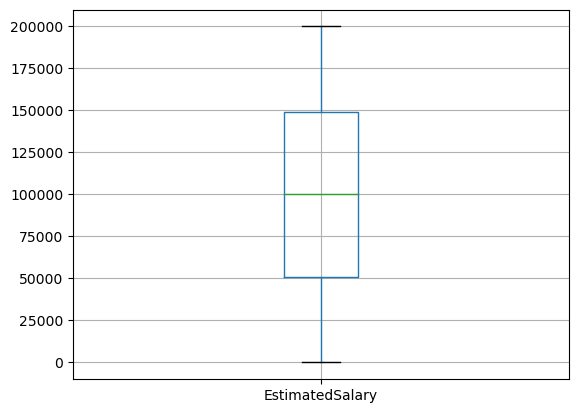

In [36]:
df.boxplot('EstimatedSalary')
plt.show()

In [37]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

In [43]:
colors = ['#4D3425','#E4512B']
ax = (df['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')



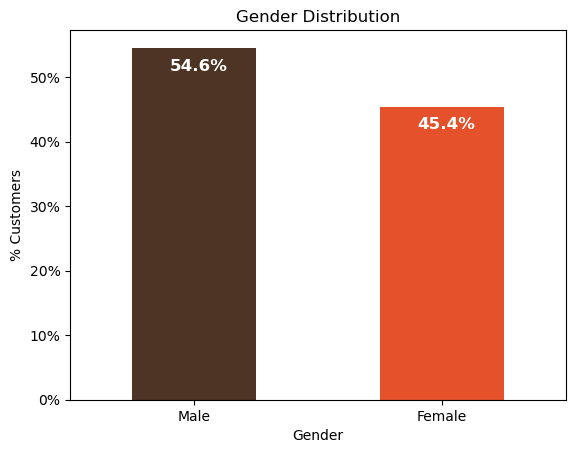

In [44]:
plt.show()

In [86]:
df['Age_Category'] = df['Age'].apply(lambda x: 'Senior_Citizen' if x >= 65 else 'Non-Senior_Citizen')
age_category_percent = (df['Age_Category'].value_counts() * 100.0 / len(df))


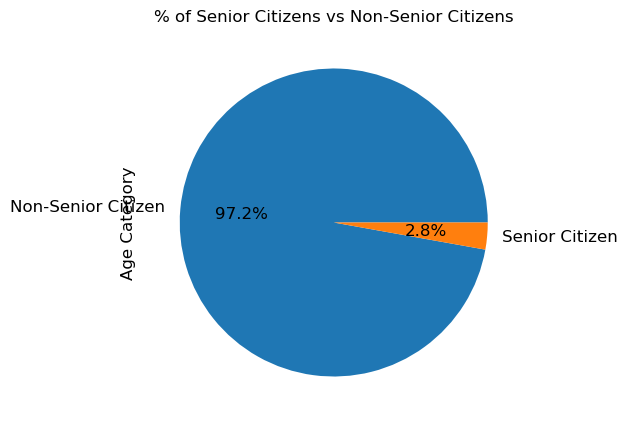

In [87]:
ax = age_category_percent.plot.pie(
    autopct='%.1f%%',
    labels=['Non-Senior Citizen', 'Senior Citizen'],
    figsize=(5, 5),
    fontsize=12
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Age Category', fontsize=12)
ax.set_title('% of Senior Citizens vs Non-Senior Citizens', fontsize=12)

plt.show()


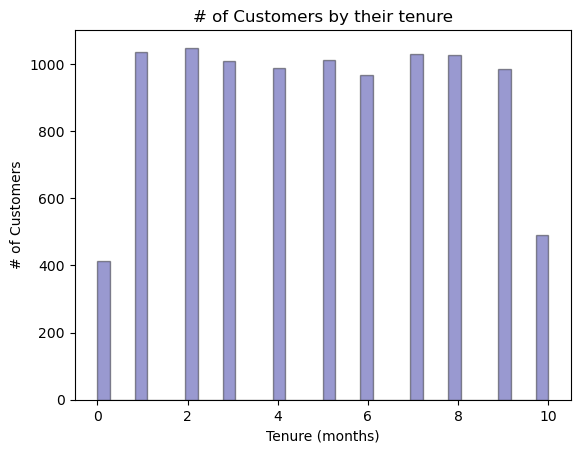

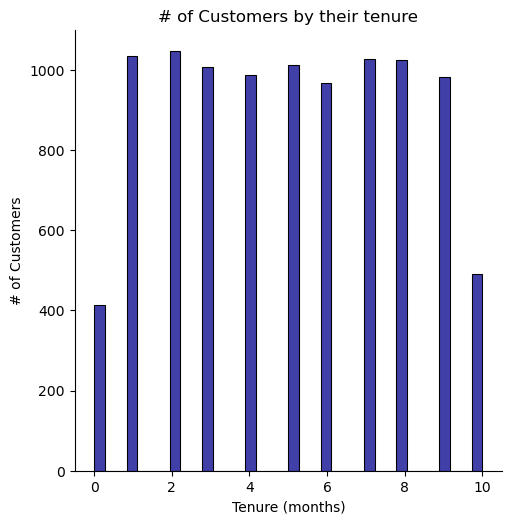

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram using sns.histplot
ax = sns.histplot(df['Tenure'], bins=int(180/5), color='darkblue', edgecolor='black')

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

plt.show()


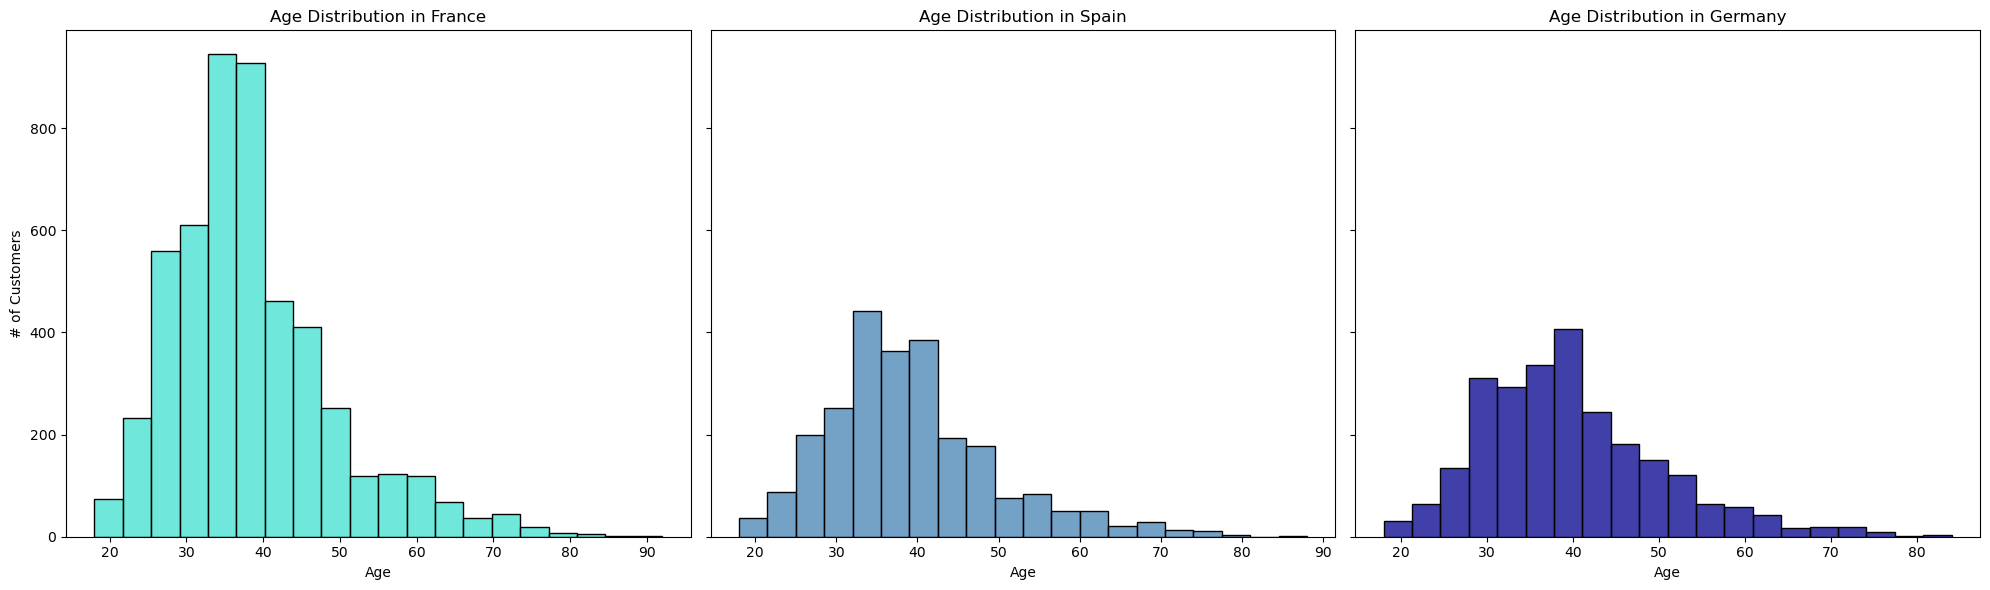

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plot for 'France'
sns.histplot(df[df['Geography'] == 'France']['Age'], bins=20, color='turquoise', edgecolor='black', ax=ax1)
ax1.set_title('Age Distribution in France')
ax1.set_xlabel('Age')
ax1.set_ylabel('# of Customers')

# Plot for 'Spain'
sns.histplot(df[df['Geography'] == 'Spain']['Age'], bins=20, color='steelblue', edgecolor='black', ax=ax2)
ax2.set_title('Age Distribution in Spain')
ax2.set_xlabel('Age')

# Plot for 'Germany'
sns.histplot(df[df['Geography'] == 'Germany']['Age'], bins=20, color='darkblue', edgecolor='black', ax=ax3)
ax3.set_title('Age Distribution in Germany')
ax3.set_xlabel('Age')

plt.tight_layout()
plt.show()

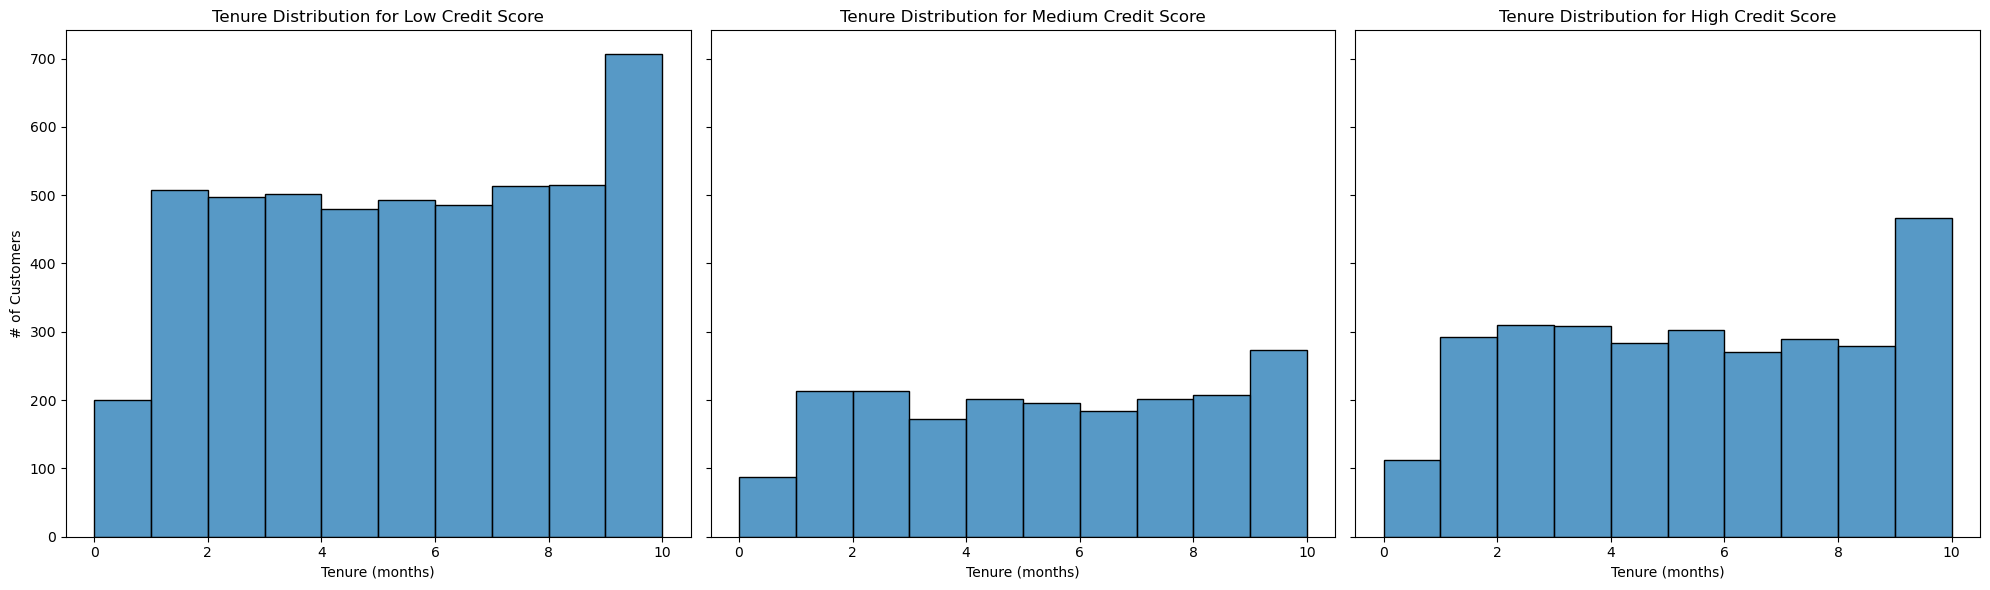

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Categorize 'Credit Score' into three categories
bins = [300, 650, 700, 850] # Adjust these values based on your data
labels = ['Low', 'Medium', 'High']
df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot for each 'Credit Score' category
for ax, category in zip(axes, labels):
    sns.histplot(df[df['CreditScoreCategory'] == category]['Tenure'], bins=10, ax=ax, edgecolor='black')
    ax.set_title(f'Tenure Distribution for {category} Credit Score')
    ax.set_xlabel('Tenure (months)')
    ax.set_ylabel('# of Customers' if ax is axes[0] else '')

plt.tight_layout()
plt.show()


In [65]:
# First Plot: Age Distribution by Geography
for geo in ['France', 'Spain', 'Germany']:
    fig = px.histogram(df[df['Geography'] == geo], x='Age', nbins=20, title=f'Age Distribution in {geo}')
    fig.update_layout(barmode='overlay', xaxis_title='Age', yaxis_title='# of Customers')
    fig.show()

# Second Plot: Tenure Distribution by Credit Score Category
# Categorize 'Credit Score'
bins = [300, 650, 700, 850]  # Adjust these values based on your data
labels = ['Low', 'Medium', 'High']
df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

for category in labels:
    fig = px.histogram(df[df['CreditScoreCategory'] == category], x='Tenure', nbins=10, title=f'Tenure Distribution for {category} Credit Score')
    fig.update_layout(barmode='overlay', xaxis_title='Tenure (months)', yaxis_title='# of Customers')
    fig.show()

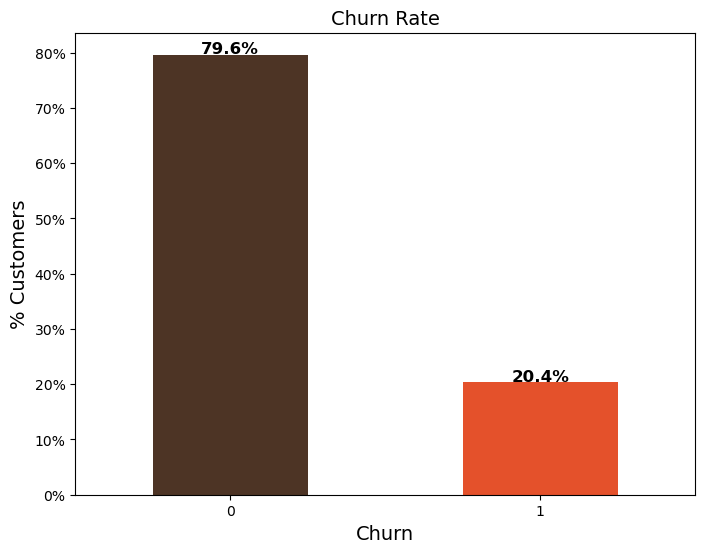

In [76]:
colors = ['#4D3425', '#E4512B']
ax = (df['Exited'].value_counts() * 100.0 / len(df)).plot(kind='bar',
                                                          stacked=True,
                                                          rot=0,
                                                          color=colors,
                                                          figsize=(8, 6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + i.get_width() / 2., i.get_height() + 1,  # Adjust the vertical position
            f'{i.get_height():.1f}%', 
            ha='center', 
            va='center',
            fontsize=12,
            color='black',  # Change text color if needed for visibility
            weight='bold')

plt.show()

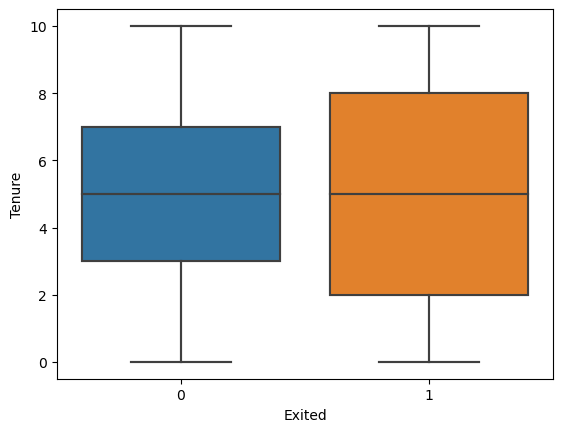

In [78]:
sns.boxplot(x = df.Exited, y = df.Tenure)
plt.show()

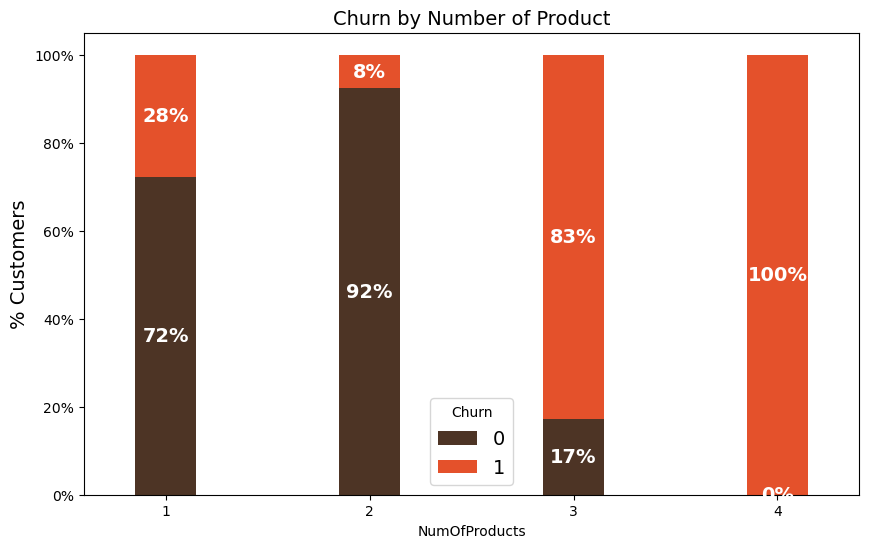

In [82]:
colors = ['#4D3425', '#E4512B']
contract_churn = df.groupby(['NumOfProducts', 'Exited']).size().unstack()

ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(
    kind='bar',
    width=0.3,
    stacked=True,
    rot=0,
    figsize=(10, 6),
    color=colors
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Number of Product', size=14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width / 2, y + height / 2),
                color='white',
                weight='bold',
                size=14,
                ha='center',
                va='center')

plt.show()

In [89]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Non-Senior_Citizen
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Senior_Citizen
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Non-Senior_Citizen
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Senior_Citizen
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Senior_Citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Non-Senior_Citizen
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Non-Senior_Citizen
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Non-Senior_Citizen
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Non-Senior_Citizen


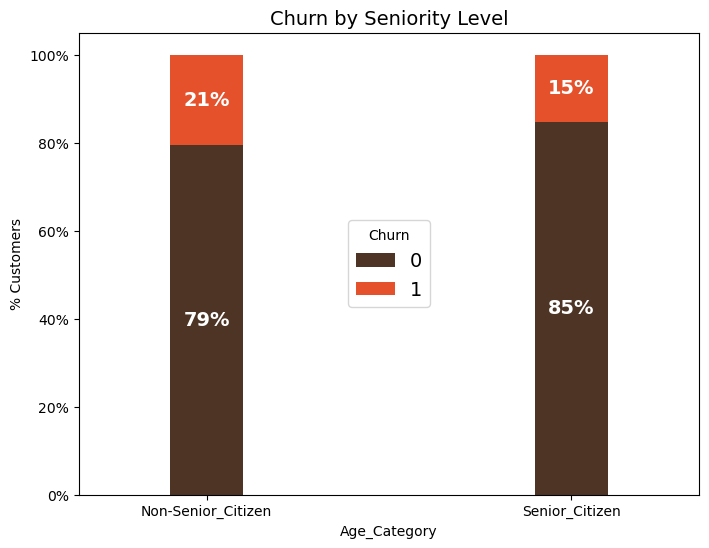

In [91]:
colors = ['#4D3425', '#E4512B']
seniority_churn = df.groupby(['Age_Category', 'Exited']).size().unstack()

ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(
    kind='bar',
    width=0.2,
    stacked=True,
    rot=0,
    figsize=(8, 6),
    color=colors
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level', size=14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width / 2, y + height / 2),
                color='white',
                weight='bold',
                size=14,
                ha='center',
                va='center')

plt.show()

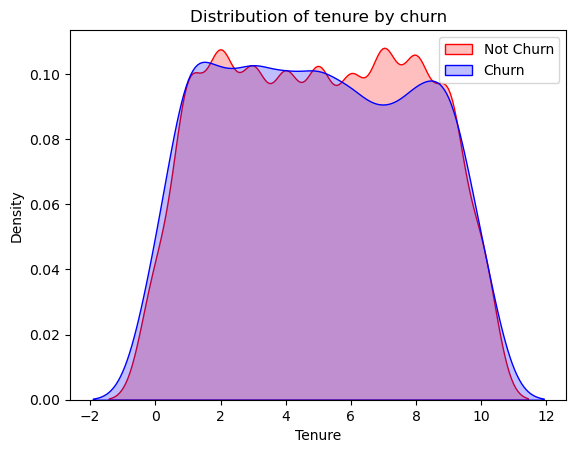

In [99]:
ax = sns.kdeplot(df.Tenure[(df["Exited"] == 0) ],
                color="Red", fill = True)
ax = sns.kdeplot(df.Tenure[(df["Exited"] == 1) ],
                ax =ax, color="Blue", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of tenure by churn')

plt.show()

In [100]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Non-Senior_Citizen
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Senior_Citizen
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Non-Senior_Citizen
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Senior_Citizen
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Senior_Citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Non-Senior_Citizen
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Non-Senior_Citizen
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Non-Senior_Citizen
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Non-Senior_Citizen


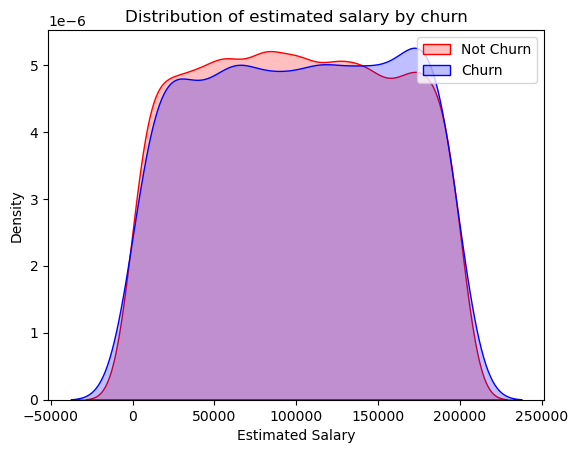

In [101]:
ax = sns.kdeplot(df.EstimatedSalary[(df["Exited"] == 0) ],
                color="Red", fill = True)
ax = sns.kdeplot(df.EstimatedSalary[(df["Exited"] == 1) ],
                ax =ax, color="Blue", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Estimated Salary')
ax.set_title('Distribution of estimated salary by churn')

plt.show()

In [102]:
df_dummies = df.copy()

In [106]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Age_Category     10000 non-null  object 
dtypes: float64(2), int64(9), object(4)
memory usage: 1.1+ MB


In [107]:
df_dummies = pd.get_dummies(df_dummies)

In [108]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Exited'].values
X = df_dummies.drop(columns = ['Exited'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [109]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [110]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [111]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8163333333333334


Axes(0.125,0.11;0.775x0.77)


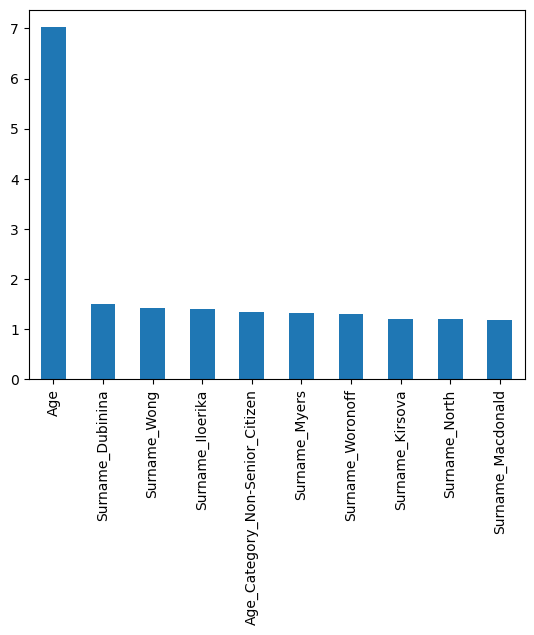

In [113]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

plt.show()

Axes(0.125,0.11;0.775x0.77)


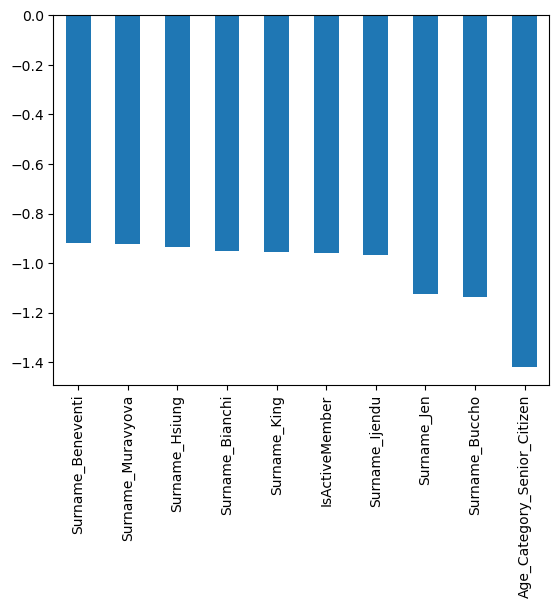

In [115]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))
plt.show()

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt",
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.7885


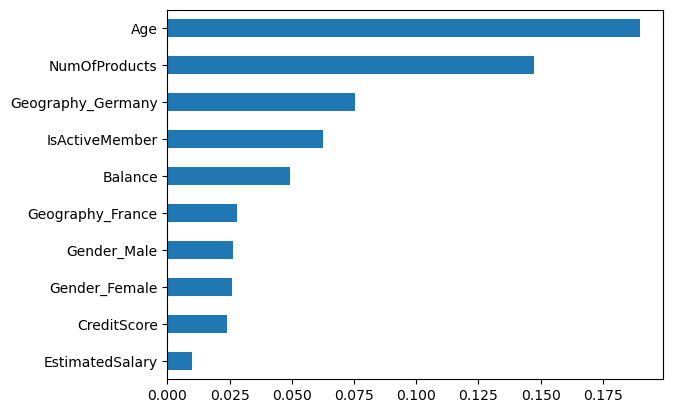

In [120]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

plt.show()